<a href="https://colab.research.google.com/github/ofekvs18/miRNA-interaction-kaggle/blob/main/Ex2_WIP_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Names and IDs
 1. Ofek Vilkerston, 212712608
 2. Maayan Weizman, 213089089

---
# Section 1
---

# I. Naive Bayes (40 pts)

In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use

```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

To fetch the original data. Each image is a 28 by 28 pixels in grayscale range [0,255] and the corresponding label is an integer $y\in [0,9]$. Each image should be transformed into a 1D integer array $x\in [0,255]^{784}$.

```
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

Divide your data into train and test sets in a 80-20 ration split. And plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


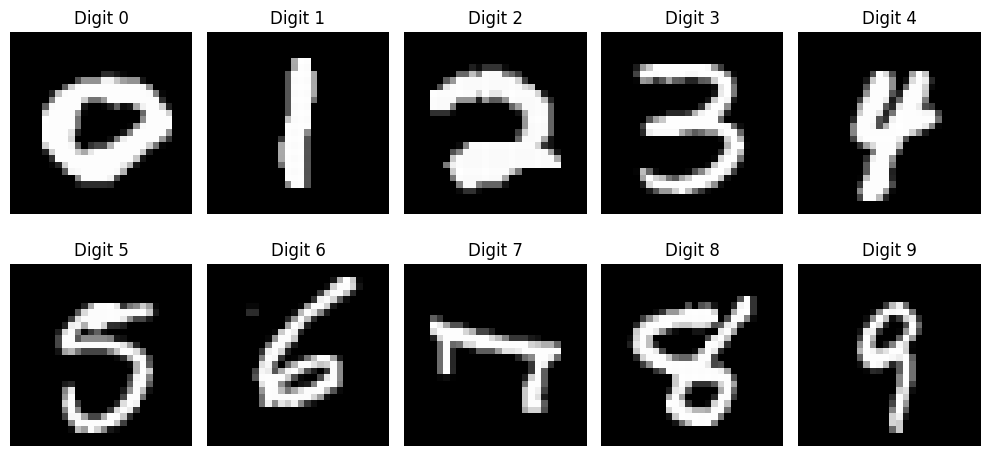

In [1]:
# Import
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

## Concate and then resplit in 8:2 ratio
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    digit_indices = np.where(y_train == i)[0]
    random_index = np.random.choice(digit_indices)
    digit_image = X_train[random_index].reshape(28, 28)
    plt.imshow(digit_image, cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that the probability of a pixel $i$ to be on given that the digit is $j$ is:
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Research the differences between the three types of Naive Bayes classifiers: Bernoulli NB, Multinomial NB, and Gaussian NB.
Describe in your own words what makes each type unique and specify the kind of tasks for which you would prefer each one.

#### Answer 1

Each of the theree designed for different data types. Bernoulli NB is for , Multinomial NB, and Gaussian NB

#### Question 2
Train a Naive Bayes classifier using the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this purpose, use the `binarize` parameter of the `BernoulliNB` function. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

    A **confusion matrix** for a multi-class classifier is a table that summarizes the performance of the model by comparing the predicted class labels to the true class labels: Each row represents the actual class, and each column represents the predicted class. The diagonal elements indicate the number of correct predictions for each class. Off-diagonal elements show misclassifications (e.g., how many times one class was predicted as another).


2. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**

#### Answer 2
Put you answer here...

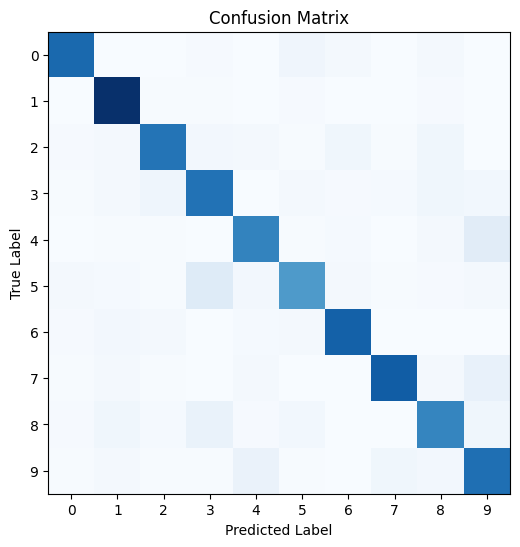

Total Accuracy: 83.49%
TODO: Summarize the result


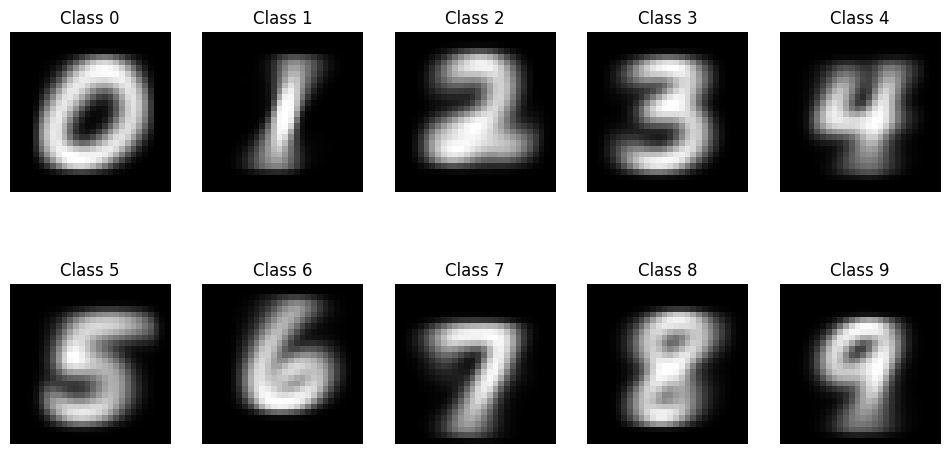

In [2]:
# code goes here
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Train
model = BernoulliNB(binarize=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar
plt.xticks(np.arange(10), np.arange(10))
plt.yticks(np.arange(10), np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate the total accuracy (fraction of correctly classified images)
accuracy = accuracy_score(y_test, y_pred)
print(f"Total Accuracy: {accuracy * 100:.2f}%")
print("TODO: Summarize the result")

# Mean Plot
mean_images = np.exp(model.feature_log_prob_)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row, col = i // 5, i % 5
    axes[row, col].imshow(mean_images[i].reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f'Class {i}')
    axes[row, col].axis('off')
plt.show()


3. We can find the optimal threshold for binarization by...



---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (60 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/ae45745d840546ffa91755d7a06af0d7

In this section you are allow to use only Decision Tree as your ML model.



In [25]:
# imports
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,PowerTransformer, QuantileTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, RFE,VarianceThreshold, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import FunctionTransformer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [4]:
# data import
drive.mount('/content/drive')
x_train = pd.read_csv("/content/drive/Shareddrives/ML/x_train.csv", index_col="id")
y_train = pd.read_csv("/content/drive/Shareddrives/ML/y_train.csv", index_col="id")

x_test = pd.read_csv("/content/drive/Shareddrives/ML/x_test.csv", index_col="id")

Mounted at /content/drive


### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions.

***Write your code below***


COMPREHENSIVE miRNA-mRNA INTERACTION DATASET EDA
Auto-detected target column: label
Merging X_df ((9055, 592)) and y_df ((9055, 1)) on 'id'...
Merged dataset shape: (9055, 593)
Analyzing sample of 1000 rows from 1000 total rows

1. DATASET OVERVIEW
----------------------------------------
Shape: (1000, 593)
Memory usage: 5.48 MB

Data Types:
  float64: 569 columns
  object: 24 columns

2. MISSING VALUES ANALYSIS
----------------------------------------
Columns with missing values: 593
                            Missing_Count  Missing_Percentage
HotPairingMirna_he_P8_L2              341                34.1
miRNAPairingCount_Total_GU            340                34.0
Acc_P31_6th                           340                34.0
HotPairingMirna_he_P8_L5              337                33.7
MRNA_Down_U_comp                      337                33.7
Acc_P6_2th                            333                33.3
Energy_MEF_Seed                       333                33.3
HotPairingMRNA

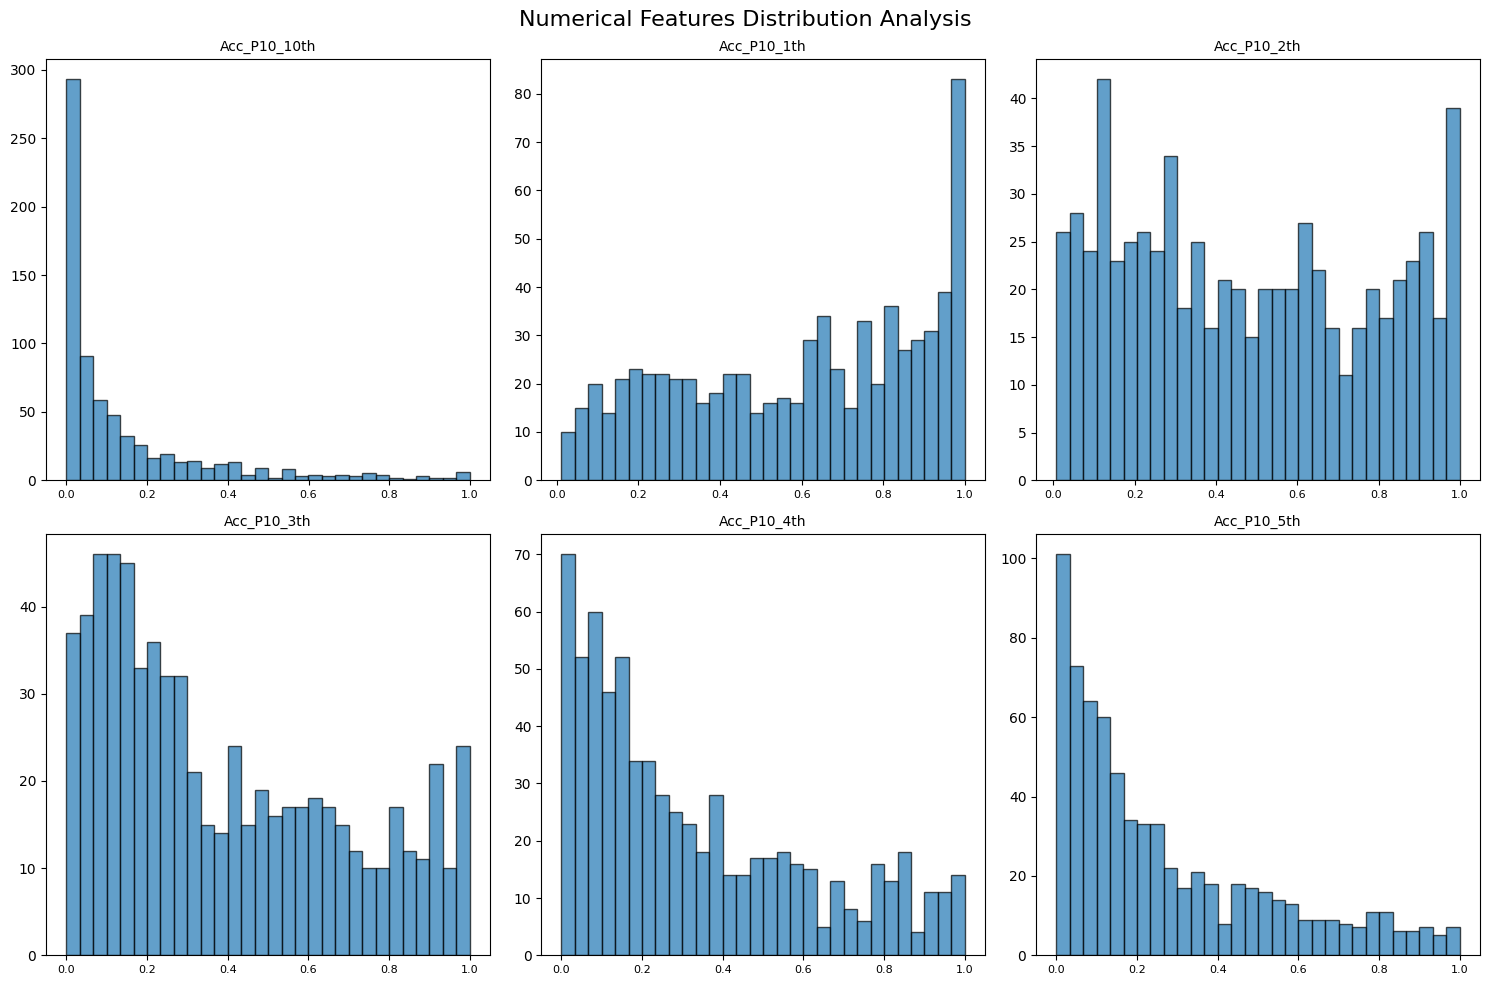


5. CATEGORICAL FEATURES ANALYSIS (24 features)
----------------------------------------
Seed_match_canonical: 2 unique values
  Values: {False: 560, True: 162}
Seed_match_noncanonical: 2 unique values
  Values: {False: 469, True: 204}
miRNAMatchPosition_1: 5 unique values
  Values: {'MM': 491, 'AU': 157, 'GU': 43, 'GC': 9, 'BB': 1}
miRNAMatchPosition_10: 5 unique values
  Values: {'MM': 263, 'AU': 181, 'GC': 149, 'BB': 47, 'GU': 40}
miRNAMatchPosition_11: 5 unique values
  Values: {'GC': 274, 'MM': 220, 'AU': 112, 'GU': 57, 'BB': 53}

6. CORRELATION ANALYSIS
----------------------------------------
High correlation pairs (|r| > 0.8): 328
  Acc_P10_10th <-> Acc_P10_6th: 0.815
  Acc_P10_10th <-> Acc_P10_7th: 0.860
  Acc_P10_10th <-> Acc_P10_8th: 0.943
  Acc_P10_10th <-> Acc_P10_9th: 0.964
  Acc_P10_10th <-> Acc_P11_10th: 0.961
  Acc_P10_10th <-> Acc_P11_6th: 0.822
  Acc_P10_10th <-> Acc_P11_7th: 0.862
  Acc_P10_10th <-> Acc_P11_8th: 0.868
  Acc_P10_10th <-> Acc_P11_9th: 0.929
  Acc_P10_

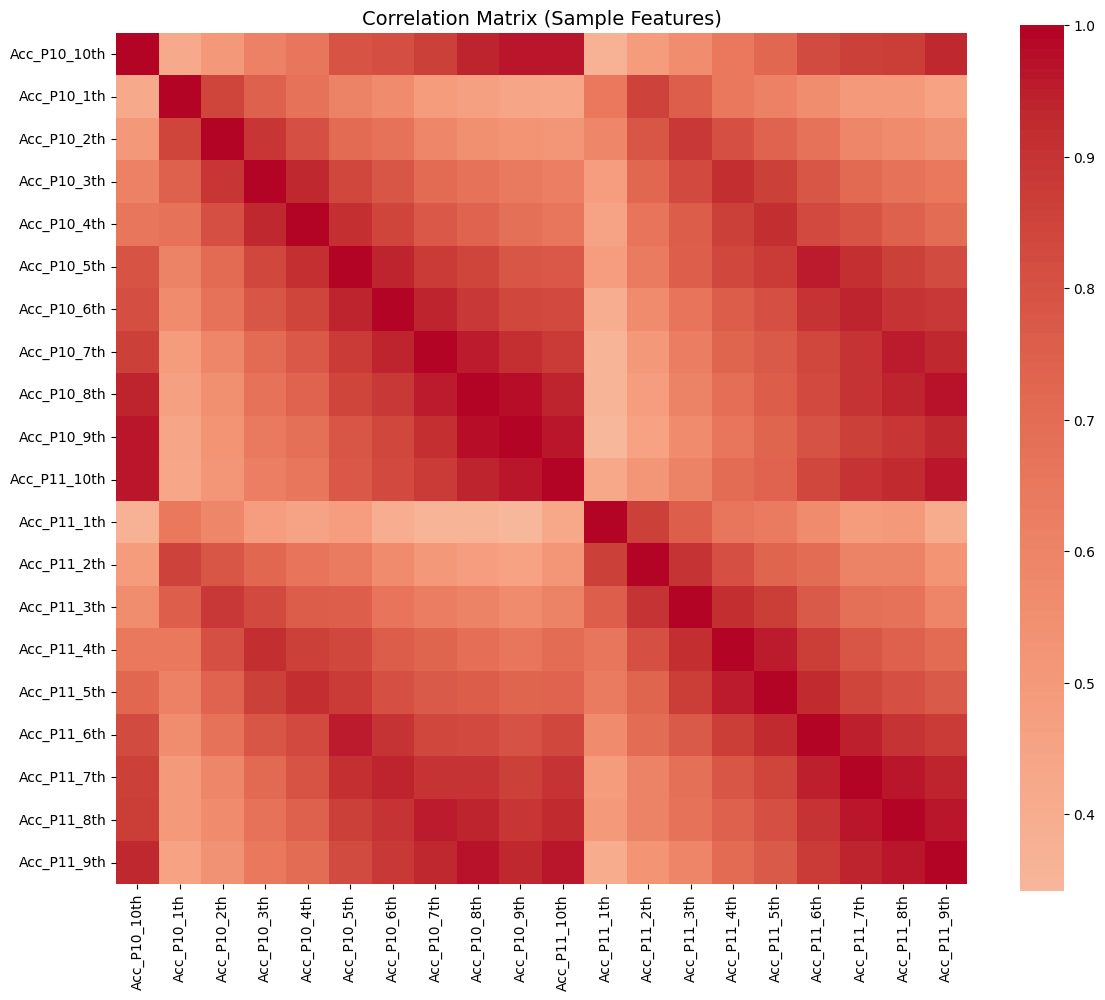


7. FEATURE VARIANCE ANALYSIS
----------------------------------------
Zero variance features: 18
Low variance features (var < 0.01): 61
Zero variance features: ['HotPairingMRNA_he_P1_L5', 'HotPairingMRNA_he_P2_L5', 'HotPairingMRNA_he_P6_L5', 'HotPairingMRNA_he_P3_L5', 'HotPairingMRNA_he_P4_L5', 'HotPairingMRNA_he_P5_L5', 'HotPairingMirna_he_P7_L5', 'HotPairingMirna_he_P5_L5', 'HotPairingMirna_he_P8_L5', 'HotPairingMirna_he_P6_L5']

8. TARGET VARIABLE ANALYSIS: label
----------------------------------------
Target statistics:
count    694.000000
mean       2.353026
std        1.122066
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: label, dtype: float64


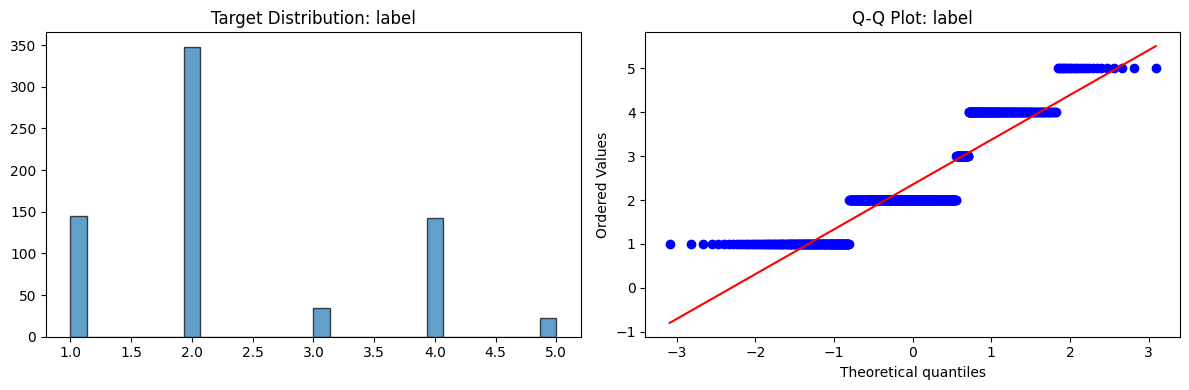


9. DATA QUALITY RECOMMENDATIONS
----------------------------------------
1. Remove 18 zero-variance features
2. Consider feature selection - 328 highly correlated pairs found
3. Handle missing values in 593 columns
4. Consider dimensionality reduction techniques (PCA, feature selection)

EDA COMPLETE


In [5]:


def comprehensive_mirna_eda(X_df, y_df=None, id_col='id', target_col=None, sample_size=None, figsize=(15, 10)):
    """
    Comprehensive Exploratory Data Analysis for miRNA-mRNA interaction datasets

    Parameters:
    -----------
    X_df : pandas.DataFrame
        The features dataset (X_train)
    y_df : pandas.DataFrame, optional
        The target dataset (y_train) - will be merged with X_df using id_col
    id_col : str, default 'id'
        Name of the ID column for merging X and y datasets
    target_col : str, optional
        Name of target variable column in y_df for supervised analysis
    sample_size : int, optional
        Number of rows to sample for analysis (useful for large datasets)
    figsize : tuple, default (15, 10)
        Figure size for plots

    Returns:
    --------
    dict : Dictionary containing analysis results and statistics
    """

    print("=" * 80)
    print("COMPREHENSIVE miRNA-mRNA INTERACTION DATASET EDA")
    print("=" * 80)

    # Merge datasets if y_df is provided
    if y_df is not None:
        if target_col is None:
            # Auto-detect target column (assume it's the non-ID column in y_df)
            target_col = [col for col in y_df.columns if col != id_col][0]
            print(f"Auto-detected target column: {target_col}")

        # Merge X and y on ID column
        print(f"Merging X_df ({X_df.shape}) and y_df ({y_df.shape}) on '{id_col}'...")
        df_analysis = X_df.merge(y_df, on=id_col, how='inner')
        print(f"Merged dataset shape: {df_analysis.shape}")

        if df_analysis.shape[0] < X_df.shape[0]:
            print(f"Warning: Lost {X_df.shape[0] - df_analysis.shape[0]} rows during merge")
    else:
        df_analysis = X_df.copy()
        print(f"Analyzing features dataset only: {df_analysis.shape}")

    # Sample data if specified
    if sample_size and sample_size < len(df_analysis):
        df_analysis = df_analysis.sample(n=sample_size, random_state=42)
        print(f"Analyzing sample of {sample_size} rows from {len(df_analysis)} total rows")

    results = {}

    # 1. BASIC DATASET INFORMATION
    print("\n1. DATASET OVERVIEW")
    print("-" * 40)
    print(f"Shape: {df_analysis.shape}")
    print(f"Memory usage: {df_analysis.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

    # Data types breakdown
    dtype_counts = df_analysis.dtypes.value_counts()
    print(f"\nData Types:")
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} columns")

    results['basic_info'] = {
        'shape': df_analysis.shape,
        'dtypes': dtype_counts.to_dict(),
        'memory_mb': df_analysis.memory_usage(deep=True).sum() / 1024**2
    }

    # 2. MISSING VALUES ANALYSIS
    print("\n2. MISSING VALUES ANALYSIS")
    print("-" * 40)
    missing_stats = df_analysis.isnull().sum()
    missing_pct = (missing_stats / len(df_analysis)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing_stats,
        'Missing_Percentage': missing_pct
    }).sort_values('Missing_Count', ascending=False)

    cols_with_missing = missing_df[missing_df['Missing_Count'] > 0]
    if len(cols_with_missing) > 0:
        print(f"Columns with missing values: {len(cols_with_missing)}")
        print(cols_with_missing.head(10))
    else:
        print("No missing values found!")

    results['missing_values'] = missing_df

    # 3. FEATURE CATEGORIZATION (based on column naming patterns)
    print("\n3. FEATURE CATEGORIZATION")
    print("-" * 40)

    feature_categories = {
        'accessibility': [col for col in df_analysis.columns if col.startswith('Acc_')],
        'energy': [col for col in df_analysis.columns if col.startswith('Energy_')],
        'hot_pairing_mrna': [col for col in df_analysis.columns if col.startswith('HotPairingMRNA_')],
        'hot_pairing_mirna': [col for col in df_analysis.columns if col.startswith('HotPairingMirna_')],
        'mrna_features': [col for col in df_analysis.columns if col.startswith('MRNA_')],
        'seed_match': [col for col in df_analysis.columns if col.startswith('Seed_match_')],
        'mirna_position': [col for col in df_analysis.columns if col.startswith('miRNAMatchPosition_')],
        'pairing_counts': [col for col in df_analysis.columns if col.startswith('miRNAPairingCount_')],
        'other': []
    }

    # Categorize remaining columns
    categorized_cols = set()
    for category, cols in feature_categories.items():
        categorized_cols.update(cols)

    feature_categories['other'] = [col for col in df_analysis.columns if col not in categorized_cols]

    for category, cols in feature_categories.items():
        if cols:
            print(f"{category.upper()}: {len(cols)} features")

    results['feature_categories'] = feature_categories

    # 4. NUMERICAL FEATURES ANALYSIS
    numerical_cols = df_analysis.select_dtypes(include=[np.number]).columns.tolist()
    if id_col in numerical_cols:
        numerical_cols.remove(id_col)  # Remove ID column

    print(f"\n4. NUMERICAL FEATURES ANALYSIS ({len(numerical_cols)} features)")
    print("-" * 40)

    if numerical_cols:
        num_stats = df_analysis[numerical_cols].describe()
        print("Summary Statistics (first 5 features):")
        print(num_stats.iloc[:, :5])

        # Distribution analysis
        fig, axes = plt.subplots(2, 3, figsize=figsize)
        fig.suptitle('Numerical Features Distribution Analysis', fontsize=16)

        # Sample some features for visualization
        sample_features = numerical_cols[:6] if len(numerical_cols) >= 6 else numerical_cols

        for i, col in enumerate(sample_features):
            if i < 6:
                row, col_idx = i // 3, i % 3
                axes[row, col_idx].hist(df_analysis[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
                axes[row, col_idx].set_title(f'{col}', fontsize=10)
                axes[row, col_idx].tick_params(axis='x', labelsize=8)

        # Remove empty subplots
        for i in range(len(sample_features), 6):
            row, col_idx = i // 3, i % 3
            fig.delaxes(axes[row, col_idx])

        plt.tight_layout()
        plt.show()

        results['numerical_stats'] = num_stats

    # 5. CATEGORICAL FEATURES ANALYSIS
    categorical_cols = df_analysis.select_dtypes(include=['object']).columns.tolist()

    print(f"\n5. CATEGORICAL FEATURES ANALYSIS ({len(categorical_cols)} features)")
    print("-" * 40)

    if categorical_cols:
        for col in categorical_cols[:5]:  # Show first 5 categorical columns
            unique_vals = df_analysis[col].nunique()
            print(f"{col}: {unique_vals} unique values")
            if unique_vals <= 10:
                print(f"  Values: {df_analysis[col].value_counts().to_dict()}")

        results['categorical_info'] = {col: df_analysis[col].value_counts().to_dict()
                                     for col in categorical_cols}

    # 6. CORRELATION ANALYSIS (for numerical features)
    if len(numerical_cols) > 1:
        print(f"\n6. CORRELATION ANALYSIS")
        print("-" * 40)

        # Sample features for correlation matrix (to avoid overcrowding)
        corr_features = numerical_cols[:50] if len(numerical_cols) > 50 else numerical_cols
        corr_matrix = df_analysis[corr_features].corr()

        # Find highly correlated pairs
        high_corr_pairs = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                corr_val = corr_matrix.iloc[i, j]
                if abs(corr_val) > 0.8:  # High correlation threshold
                    high_corr_pairs.append((corr_matrix.columns[i],
                                          corr_matrix.columns[j],
                                          corr_val))

        print(f"High correlation pairs (|r| > 0.8): {len(high_corr_pairs)}")
        if high_corr_pairs:
            for pair in high_corr_pairs[:10]:  # Show first 10
                print(f"  {pair[0]} <-> {pair[1]}: {pair[2]:.3f}")

        # Plot correlation heatmap for sample features
        plt.figure(figsize=(12, 10))
        sample_corr = corr_matrix.iloc[:20, :20] if corr_matrix.shape[0] > 20 else corr_matrix
        sns.heatmap(sample_corr, annot=False, cmap='coolwarm', center=0, square=True)
        plt.title('Correlation Matrix (Sample Features)', fontsize=14)
        plt.tight_layout()
        plt.show()

        results['high_correlations'] = high_corr_pairs

    # 7. FEATURE VARIANCE ANALYSIS
    if numerical_cols:
        print(f"\n7. FEATURE VARIANCE ANALYSIS")
        print("-" * 40)

        variances = df_analysis[numerical_cols].var().sort_values(ascending=False)
        zero_var_features = variances[variances == 0]
        low_var_features = variances[(variances > 0) & (variances < 0.01)]

        print(f"Zero variance features: {len(zero_var_features)}")
        print(f"Low variance features (var < 0.01): {len(low_var_features)}")

        if len(zero_var_features) > 0:
            print("Zero variance features:", list(zero_var_features.index[:10]))

        results['variance_analysis'] = {
            'zero_variance': list(zero_var_features.index),
            'low_variance': list(low_var_features.index)
        }

    # 8. TARGET VARIABLE ANALYSIS (if provided)
    if target_col and target_col in df_analysis.columns:
        print(f"\n8. TARGET VARIABLE ANALYSIS: {target_col}")
        print("-" * 40)

        if df_analysis[target_col].dtype in ['object', 'category']:
            # Categorical target
            target_counts = df_analysis[target_col].value_counts()
            print("Target distribution:")
            print(target_counts)

            # Plot target distribution
            plt.figure(figsize=(8, 6))
            target_counts.plot(kind='bar')
            plt.title(f'Target Variable Distribution: {target_col}')
            plt.xlabel(target_col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            # Numerical target
            print(f"Target statistics:")
            print(df_analysis[target_col].describe())

            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.hist(df_analysis[target_col].dropna(), bins=30, alpha=0.7, edgecolor='black')
            plt.title(f'Target Distribution: {target_col}')

            plt.subplot(1, 2, 2)
            stats.probplot(df_analysis[target_col].dropna(), dist="norm", plot=plt)
            plt.title(f'Q-Q Plot: {target_col}')
            plt.tight_layout()
            plt.show()

    # 9. RECOMMENDATIONS
    print(f"\n9. DATA QUALITY RECOMMENDATIONS")
    print("-" * 40)

    recommendations = []

    if len(zero_var_features) > 0:
        recommendations.append(f"Remove {len(zero_var_features)} zero-variance features")

    if len(high_corr_pairs) > 10:
        recommendations.append(f"Consider feature selection - {len(high_corr_pairs)} highly correlated pairs found")

    if len(cols_with_missing) > 0:
        recommendations.append(f"Handle missing values in {len(cols_with_missing)} columns")

    if len(numerical_cols) > 100:
        recommendations.append("Consider dimensionality reduction techniques (PCA, feature selection)")

    if not recommendations:
        recommendations.append("Dataset appears to be in good shape for analysis!")

    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

    results['recommendations'] = recommendations

    print(f"\n{'='*80}")
    print("EDA COMPLETE")
    print(f"{'='*80}")

    return results

results = comprehensive_mirna_eda(x_train, y_train, sample_size=1000)


In [6]:
# Explain here

### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it.

***Write your code below***

In [7]:
# preprocessing classes
class CorrelationFeatureRemover(BaseEstimator, TransformerMixin):
    """
    Remove highly correlated features - fits into your existing pipeline.
    """

    def __init__(self, correlation_threshold=0.95, method='pearson'):
        self.correlation_threshold = correlation_threshold
        self.method = method
        self.features_to_remove_ = None

    def fit(self, X, y=None):
        # Convert to DataFrame if necessary
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        # Only work with numerical columns (like your DropZeroStd)
        X_num = X.select_dtypes(include=['int64', 'float64'])

        if X_num.empty:
            self.features_to_remove_ = []
            return self

        # Calculate correlation matrix
        correlation_matrix = X_num.corr(method=self.method)

        # Find features to remove
        features_to_remove = set()
        highly_correlated_pairs = []

        for i in range(len(correlation_matrix.columns)):
            for j in range(i + 1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]

                if abs(corr_val) >= self.correlation_threshold:
                    feat1 = correlation_matrix.columns[i]
                    feat2 = correlation_matrix.columns[j]
                    highly_correlated_pairs.append((feat1, feat2, corr_val))

                    # Conservative approach: keep first, remove second
                    features_to_remove.add(feat2)

        self.features_to_remove_ = list(features_to_remove)

        print(f"CorrelationFeatureRemover: Found {len(highly_correlated_pairs)} "
              f"highly correlated pairs (|r| >= {self.correlation_threshold})")
        print(f"Will remove {len(self.features_to_remove_)} redundant features")
        # write to file the features to remove
        with open('features_to_remove.txt', 'w') as f:
            f.write('\n'.join(self.features_to_remove_))
        return self

    def transform(self, X):
        if self.features_to_remove_ is None:
            raise ValueError("This CorrelationFeatureRemover instance is not fitted yet.")

        # Remove correlated features
        if isinstance(X, pd.DataFrame):
            features_to_keep = [col for col in X.columns if col not in self.features_to_remove_]
            return X[features_to_keep]
        else:
            # If numpy array, we can't remove by name, so return as is
            # (This would need column tracking, but your pipeline uses DataFrames)
            return X

class DropZeroStd(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        self.columns_to_keep_ = []

        # Handle NUMERICAL columns (original logic)
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
        if len(numerical_cols) > 0:
            stds = X[numerical_cols].std(axis=0, skipna=True)
            numerical_to_keep = stds[stds > 0].index.tolist()
            self.columns_to_keep_.extend(numerical_to_keep)
            print(f"DropZeroStd - Numerical: keeping {len(numerical_to_keep)}/{len(numerical_cols)} columns")

        # Handle CATEGORICAL columns (new logic)
        categorical_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns
        categorical_to_keep = []

        for col in categorical_cols:
            # Check if categorical column has meaningful variation
            unique_count = X[col].nunique()
            total_count = len(X[col].dropna())

            # Keep if:
            # 1. More than 1 unique value AND
            # 2. Not all values are the same (accounting for missing values)
            if unique_count > 1 and unique_count < total_count:
                categorical_to_keep.append(col)
            elif unique_count == 1:
                print(f"DropZeroStd - Dropping categorical '{col}': only 1 unique value ({X[col].dropna().iloc[0]})")
            elif unique_count == total_count:
                # Every row has a different value - might be an ID column, keep but warn
                print(f"DropZeroStd - Keeping categorical '{col}': {unique_count} unique values (might be ID-like)")
                categorical_to_keep.append(col)

        self.columns_to_keep_.extend(categorical_to_keep)
        print(f"DropZeroStd - Categorical: keeping {len(categorical_to_keep)}/{len(categorical_cols)} columns")

        print(f"DropZeroStd - Total: keeping {len(self.columns_to_keep_)}/{len(X.columns)} columns")

        return self

    def transform(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        # Only keep columns that exist in the current dataframe
        available_columns = [col for col in self.columns_to_keep_ if col in X.columns]
        return X[available_columns]


In [17]:
def build_preprocessor(X, correlation_threshold=0.85):
   """
   Build preprocessor that's safe for cross-validation.
   Pre-fits the column-changing transformers on the full dataset.
   """

   # Pre-fit transformers on full dataset to ensure consistent column handling across CV folds
   dropzerostd = DropZeroStd()
   correlation_remover = CorrelationFeatureRemover(correlation_threshold=correlation_threshold)

   X_temp = dropzerostd.fit_transform(X.copy())
   X_temp = correlation_remover.fit_transform(X_temp)

   print(f"After columns drop: {X_temp.shape[1]} total columns")

   # Check what types of columns we have
   num_cols = X_temp.select_dtypes(include=['int64', 'float64']).columns
   cat_cols = X_temp.select_dtypes(include=['object', 'category', 'bool']).columns

   # Check for boolean-like numeric columns
   bool_like_cols = []
   for col in num_cols:
       unique_vals = set(X_temp[col].dropna().unique())
       if unique_vals.issubset({0, 1}) or unique_vals.issubset({0.0, 1.0}):
           bool_like_cols.append(col)

   print(f"Found {len(num_cols)} numerical, {len(cat_cols)} categorical, {len(bool_like_cols)} boolean-like columns")
   print(f"Total check: {len(num_cols)} + {len(cat_cols)} = {len(num_cols) + len(cat_cols)} = {X_temp.shape[1]} ✓")  # Added: Math verification

   # Pipelines
   num_pipeline = Pipeline([
      #  ('imputer', SimpleImputer(strategy='median')),
       ('imputer', KNNImputer(n_neighbors=5, weights='distance')),
       ('scaler', StandardScaler())
   ])

   cat_pipeline = Pipeline([
       ('imputer', SimpleImputer(strategy='most_frequent')),
       ('onehot', OneHotEncoder(handle_unknown='ignore'))
   ])

   # Use make_column_selector instead of fixed column names
   # This selects columns by TYPE, not by name
   preprocessor = Pipeline([
       ('drop_const', dropzerostd),  # Changed: Use pre-fitted instance instead of new DropZeroStd()
       ('correlation_removal', correlation_remover),  # Changed: Use pre-fitted instance instead of new CorrelationFeatureRemover()
       ('column_processing', ColumnTransformer([
           ('num', num_pipeline, make_column_selector(dtype_include=['int64', 'float64'])),
           ('cat', cat_pipeline, make_column_selector(dtype_include=['object', 'category', 'bool']))
       ])),
       ('feature_selection', SelectKBest(f_classif, k=150)),
   ])

   return preprocessor


In [20]:
# ADDED: Import for label-based imputation
from sklearn.base import BaseEstimator, TransformerMixin

# ADDED: Custom transformer for label-based KNN imputation
class LabelBasedKNNImputer(BaseEstimator, TransformerMixin):
    def __init__(self, n_neighbors=5, fallback_strategy='median'):
        self.n_neighbors = n_neighbors
        self.fallback_strategy = fallback_strategy
        self.imputers_ = {}
        self.global_imputer_ = None
        self.feature_columns_ = None

    def fit(self, X, y):
        """Fit imputers for each label group"""
        self.feature_columns_ = X.columns if hasattr(X, 'columns') else None

        # Fit global imputer as fallback
        self.global_imputer_ = KNNImputer(n_neighbors=self.n_neighbors)
        self.global_imputer_.fit(X)

        # Fit label-specific imputers
        for label in y.unique():
            if pd.isna(label):  # Skip NaN labels
                continue
            label_mask = (y == label)
            X_label = X[label_mask]

            # Only create imputer if we have enough samples
            if len(X_label) > self.n_neighbors:
                imputer = KNNImputer(n_neighbors=self.n_neighbors)
                imputer.fit(X_label)
                self.imputers_[label] = imputer

        return self

    def transform(self, X, y=None):
        """Transform using label-specific imputers when available"""
        X_result = X.copy()

        if y is not None:
            # Use label-specific imputation when labels are available
            for label in y.unique():
                if pd.isna(label) or label not in self.imputers_:
                    continue

                label_mask = (y == label)
                if label_mask.sum() > 0:
                    X_result.loc[label_mask] = self.imputers_[label].transform(X.loc[label_mask])

            # Use global imputer for remaining missing values or unseen labels
            remaining_na_mask = X_result.isna().any(axis=1)
            if remaining_na_mask.sum() > 0:
                X_result.loc[remaining_na_mask] = self.global_imputer_.transform(X.loc[remaining_na_mask])
        else:
            # No labels available, use global imputer
            X_result = pd.DataFrame(
                self.global_imputer_.transform(X),
                index=X.index,
                columns=X.columns
            )

        return X_result

In [33]:
def build_mrna_preprocessor(X, correlation_threshold=0.85, use_species_imputation=True):
    """
    Genomics-specific preprocessor that handles column types properly
    """

    # Your existing preprocessing
    dropzerostd = DropZeroStd()
    correlation_remover = CorrelationFeatureRemover(correlation_threshold=correlation_threshold)

    X_temp = dropzerostd.fit_transform(X.copy())
    X_temp = correlation_remover.fit_transform(X_temp)

    print(f"After drops: {X_temp.shape[1]} columns")

    # Check data types
    num_cols = X_temp.select_dtypes(include=[np.number]).columns
    cat_cols = X_temp.select_dtypes(include=[object, 'category', 'bool']).columns

    print(f"Numerical: {len(num_cols)}, Categorical: {len(cat_cols)}")

    # Genomics-specific numerical pipeline
    num_pipeline = Pipeline([
        ('log_transform', FunctionTransformer(np.log1p, validate=False)),  # ADDED: Log transform
        ('clip_values', FunctionTransformer(lambda x: np.clip(x, -1e5, 1e5), validate=False)), # ADDED: Clip values to prevent infinities/large values

        ('imputer', LabelBasedKNNImputer(n_neighbors=8)),                  # Your species-aware imputer
        ('variance_filter', VarianceThreshold(threshold=0.02)),            # ADDED: Remove low-variance
        ('scaler', StandardScaler())
    ])

    # Categorical pipeline (if any)
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Column transformer
    preprocessor = Pipeline([
        ('correlation_removal', correlation_remover),
        ('column_processing', ColumnTransformer([
            ('num', num_pipeline, make_column_selector(dtype_include=[np.number])),
            ('cat', cat_pipeline, make_column_selector(dtype_include=[object, 'category', 'bool']))
        ])),
        ('feature_selection', SelectKBest(f_classif, k=200))  # CHANGED: Reduced k for genomics
    ])

    return preprocessor

In [34]:
# Implement here
labeled_mask = y_train['label'].notnull()
x_labeled = x_train.loc[labeled_mask]
y_labeled = y_train.loc[x_labeled.index]
x_not_labeled = x_train.loc[~labeled_mask]

x_trainval, x_traintest, y_trainval, y_traintest = train_test_split(
    x_labeled, y_labeled,
    test_size=0.2,
    stratify=y_labeled,
    random_state=42
)


# 1. Build preprocessing + model pipeline
model_pipeline = Pipeline([
    ('preprocessor', build_mrna_preprocessor(x_trainval)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# 2. Define parameter grid for the classifier
param_grid = {
    'classifier__max_depth': [8,10],
    'classifier__min_samples_leaf': [ 8,10]
}

# 3. Setup grid search with CV
grid = GridSearchCV(
    model_pipeline,
    param_grid=param_grid,
    cv=2,  # Number of folds
    scoring='accuracy',  # or accuracy, recall, etc.
    n_jobs=-1,  # parallelism if supported
    verbose=3
)

# 4. Run grid search on your training data
grid.fit(x_trainval, y_trainval['label'])

# 5. Get best model and score
print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy score:", grid.best_score_)



DropZeroStd - Numerical: keeping 550/568 columns
DropZeroStd - Categorical: keeping 24/24 columns
DropZeroStd - Total: keeping 574/592 columns
CorrelationFeatureRemover: Found 1946 highly correlated pairs (|r| >= 0.85)
Will remove 345 redundant features
After drops: 229 columns
Numerical: 205, Categorical: 24
Fitting 2 folds for each of 4 candidates, totalling 8 fits
CorrelationFeatureRemover: Found 1946 highly correlated pairs (|r| >= 0.85)
Will remove 345 redundant features
Best parameters: {'classifier__max_depth': 8, 'classifier__min_samples_leaf': 8}
Best cross-validated accuracy score: nan


In [35]:
# use best model to predict and score the x_traintest data with the y_traintest

best_model = grid.best_estimator_
score = best_model.score(x_traintest, y_traintest)
print("Test score:", score)

Test score: 0.6857816182246661


### Model training (15 pts):
Train your Decision Tree model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.

***Write your code below***

In [10]:
# Implement here

In [11]:
# Explain here

### Model evaluation (15 pts):
Eevaluate your ML model using different evaluation metrics.
For every evaluation metric mention below add your model score and answer the following questions:

What does this evaluation metric mean? is it relevant to this prediction task?
Do you think the score you got is good for this task?


***Write your code below***

In [36]:
# Implement here

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

submission = pd.DataFrame({
    'id': x_test.index,
    'label': y_pred
})

print(pd.Series(y_pred).value_counts().sort_index())
submission.to_csv('submission.csv', index=False)


1.0     5809
2.0    13323
4.0     2917
5.0     1156
Name: count, dtype: int64


In [13]:
# List of evaluation metrics
# Accuracy -
# Balanced Accuracy -
# Micro Precision -
# Micro Recall -
# Micro F1-score -
# Macro Precision -
# Macro Recall -
# Macro F1-score -
# Weighted Precision -
# Weighted Recall -
# Weighted F1-score -

### Explainability (10 pts):
Explain the results of your model using SHAP and attach relevant outputs. Explain at least three conclusions following the SHAP outputs.

**Note:**
Use the animal names in your conclusions and not the label numbers.

***Write your code below***

In [14]:
# Implement here

In [15]:
# Explain here

### Competition rank (5 pts - bonus):
The competition will be open until 10.6.25 at 23:59. The results of the competition will be published about 12 hours later under the private tab on the leaderboard.

The scoring of this section is relative to the location (between 0-5 pts).

Indicate here your team name in the competition and **attach an additinal notebook\python code** with which we can reproduce the rank you received.


In [16]:
# My team name was: